In [1]:
%matplotlib inline


In [2]:
# Dependencies
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import pandas as pd 
import numpy as np 
import os



In [3]:
# Load files
city_data_to_load = os.path.join("Resources", "city_data.csv" )
ride_data_to_load = os.path.join("Resources", "ride_data.csv")


In [4]:
# Read data files and store them in DataFrames
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


In [5]:
# Combine the data into a single dataset
pyber_challenge_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_challenge_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
# Total Rides by city type
total_rides = pyber_challenge_df.groupby(["type"]).count()["ride_id"]
total_rides


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# Total Drivers by city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
# Total Fares
total_fares = pyber_challenge_df.groupby(["type"]).sum()["fare"]
total_fares


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
# Avg Fare per Ride
avg_fare_per_ride = total_fares / total_rides
avg_fare_per_ride



type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
# Avg Fare per Driver
avg_fare_per_driver = total_fares / total_drivers
avg_fare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
# Creating a summary DataFrame using lists of values with keys
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides, 
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": avg_fare_per_ride,
    "Average Fare per Driver": avg_fare_per_driver})
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
# Formatting summary DataFrame columns
pyber_summary_df.index.name = None
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [13]:
# Rename DataFrame columns
pyber_challenge_df.rename(columns = {'city':'City', 'date':'Date', 'fare':'Fare', 'ride_id':'Ride Id', 'driver_count': 'No. Drivers', 'type':'City Type'}, inplace = True)
pyber_challenge_df


,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
# Set index to Date column
date_index = pyber_challenge_df.set_index(["Date"])
pyber_challenge_dateindex_df = pd.DataFrame(date_index)
pyber_challenge_dateindex_df


,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [15]:
# Create a fare DataFrame using copy()
fares_df = pyber_challenge_df[['Date', 'City Type', 'Fare']].copy()
fares_df


,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-03-04 18:24:09,Urban,30.24
2,2019-02-24 04:29:00,Urban,33.44
3,2019-02-10 23:22:03,Urban,23.44
4,2019-03-06 04:28:35,Urban,34.58
...,...,...,...
2370,2019-04-29 17:04:39,Rural,13.38
2371,2019-01-30 00:05:47,Rural,20.76
2372,2019-02-10 21:03:50,Rural,11.11
2373,2019-05-07 19:22:15,Rural,44.94


In [16]:
# Check Fares_df info
fares_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
Date         2375 non-null object
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: float64(1), object(2)
memory usage: 74.2+ KB


In [17]:
# Convert date index from object to datetime
fares_df["Date"] = pd.to_datetime(fares_df["Date"])
fares_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
Date         2375 non-null datetime64[ns]
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 74.2+ KB


In [18]:
# Create new df on total fares by type and by date
fares_by_type_date = fares_df.groupby(["City Type", "Date"]).sum()["Fare"]
fares_by_type_date_df = pd.DataFrame(fares_by_type_date)

fares_by_type_date_df.head()


Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33

In [19]:
# Create a pivot table df
fares_pivot_df = fares_df.pivot(index='Date', columns='City Type', values='Fare')

fares_pivot_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [20]:
# Create a new df from pivot within date criteria
fares_pivot_sub_df = fares_pivot_df.loc['2019-01-01': '2019-04-28']

fares_pivot_sub_df



City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [21]:
# Resample fares_pivot_sub_df into weekly sum
fares_pivot_sub_wk_df = fares_pivot_sub_df.resample('W', how='sum')

fares_pivot_sub_wk_df.head()


C:\Users\sable\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


<Figure size 432x288 with 0 Axes>

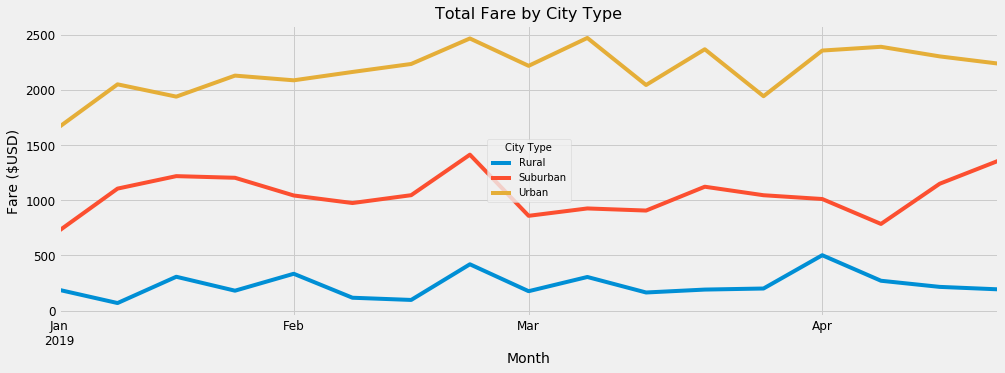

In [23]:
# Generate graph

plt.style.use('fivethirtyeight')
plt.figure()
plt.rcParams["figure.figsize"]=(15,5)
fares_pivot_sub_wk_df.plot()
plt.xlabel('Month', fontsize="14")
plt.ylabel('Fare ($USD)', fontsize="14")
plt.xticks(fontsize="12")
plt.yticks(fontsize="12")
plt.title('Total Fare by City Type', fontsize="16")
lgnd = plt.legend(fontsize="10", mode="Expanded", loc="best", title="City Type")
lgnd.get_title().set_fontsize(10)

plt.savefig("Analysis/Fig8.png")

plt.show()


